<a href="https://colab.research.google.com/github/MlvPrasadOfficial/3D_Object_Detection_and_Object_Tracking_Project/blob/main/3D_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the 3D Object Detection & Visualization Workshop!
In this notebook, you'll work with a sequence of images and point clouds, and will learn to run 3D object detection algorithms to them. We will also learn how to visualize our results in 2D and 3D environments. So let us begin.
<p>

**Note:** This notebook has been adapted for educational purpose from [this repo](https://github.com/hailanyi/3D-Detection-Tracking-Viewer), and the model is running with weights downloaded on [this repo](https://github.com/open-mmlab/OpenPCDet).

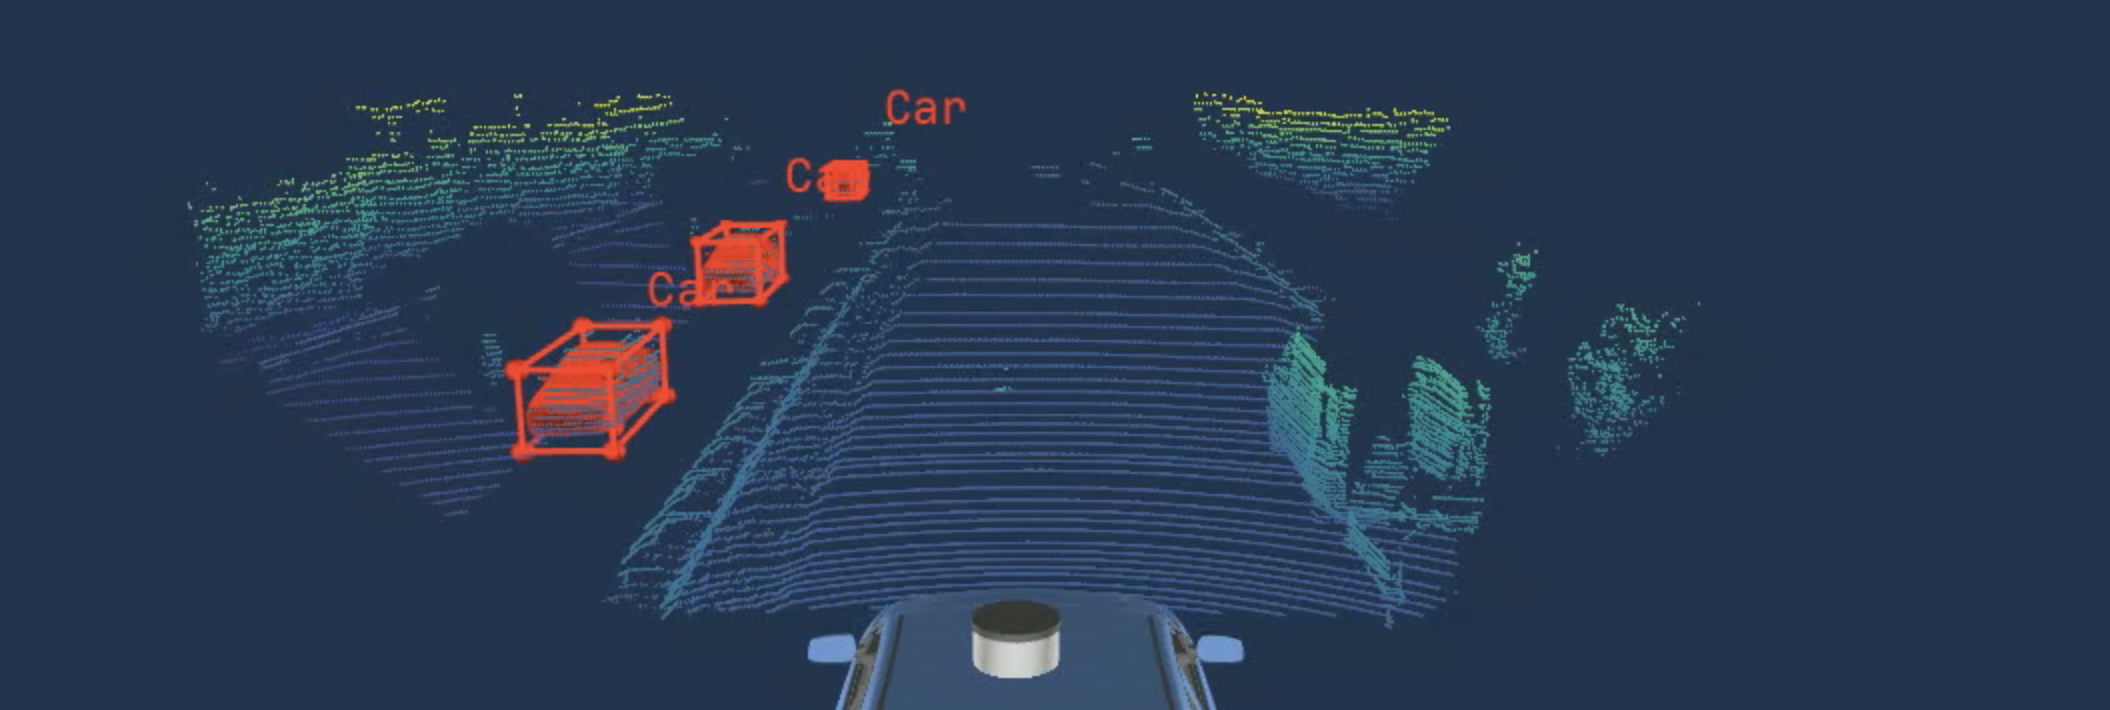

## **Introduction:** Data Download & Colab Setup (5 min)
You didn't expect us to start from a blank page, did you? We are going to need to download some data, like images, and pieces of code to make our work faster.
No worries, what's downloaded and abstracted is just a set of helpers, and will be explained.

##### **VISUALIZER**
Let's begin with the visualization data. We have a folder that contains:
* **car.obj**: The 3D object of cars detected
* **ego_car.3ds**: The 3D Object of our car (called ego)
* **color_map.py**: A file that generates colors for detected objects and points
* **box_op.py**: This creates 2D and 3D Bounding Boxes
* **viewer.py**: Our "main" visualizer file (spend time here!!!)
* **utils.py**: An extra file we create to visualize the 3d results as images and videos (this will look cool on your portfolio)

In [1]:
 !wget https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/viewer.zip && unzip -q viewer.zip

--2023-10-31 15:58:07--  https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/viewer.zip
Resolving thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)... 3.5.76.161, 3.5.79.115, 52.92.137.34, ...
Connecting to thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)|3.5.76.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570215 (557K) [application/zip]
Saving to: ‘viewer.zip’

viewer.zip          100%[===================>] 556.85K   675KB/s    in 0.8s    

2023-10-31 15:58:08 (675 KB/s) - ‘viewer.zip’ saved [570215/570215]



##### **DATA**
Next, we download a sequence from the KITTI Dataset. It contains:
* A series of images
* A series of corresponding LiDAR scans
* Calibration Files (setup)
* A Pose file containing the positions of our car

In [2]:
!wget https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/data.zip && unzip -q data.zip

--2023-10-31 15:58:08--  https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/data.zip
Resolving thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)... 3.5.76.161, 3.5.79.115, 52.92.137.34, ...
Connecting to thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)|3.5.76.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698872097 (666M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 666.50M  21.3MB/s    in 46s     

2023-10-31 15:58:55 (14.5 MB/s) - ‘data.zip’ saved [698872097/698872097]



##### **MULTI-OBJECT TRACKER**
The main process will happen this way:
1. We load the LiDAR Point Cloud
2. We detect objects using Deep Learning on the LiDAR
3. We track these objects and display them on the image

For that, we'll need to download some weight files for the LiDAR Object detector, as well as some helper functions for tracking.

In [3]:
!wget https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/multi_object_tracking.zip && unzip -q multi_object_tracking.zip

--2023-10-31 15:59:07--  https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/multi_object_tracking.zip
Resolving thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)... 3.5.81.128, 52.92.177.194, 52.92.226.42, ...
Connecting to thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)|3.5.81.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2672697 (2.5M) [application/zip]
Saving to: ‘multi_object_tracking.zip’

multi_object_tracki 100%[===================>]   2.55M  2.19MB/s    in 1.2s    

2023-10-31 15:59:09 (2.19 MB/s) - ‘multi_object_tracking.zip’ saved [2672697/2672697]



For convenience, let's move everything under Multi-Object Tracking folder.

In [4]:
!mv data multi_object_tracking/data
!mv viewer multi_object_tracking/viewer

##### **MESA GRAPHICS 3D**

Now, we're ready to install **MESA GRAPHICS 3D**, a Library to visualize data in 3D; as well as Linux Virtual framebuffers. <p>

In [5]:
"""
Xvfb  is  an  X  server  that can run on machines with no display hardware and no physical
       input devices.  It emulates a dumb virtual display using virtual memory.
        -Since colab has no display servers, we need virtual display to render charts


libgl1-mesa-dev = graphics lib that is used to build VTk (on which vedo is built)

"""
!sudo apt-get update
!sudo apt-get install libgl1-mesa-dev libgl1-mesa-glx  xvfb -qq

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [557 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,184 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,415 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,012 kB]

In [7]:
!pip install numpy==1.23.5
!pip install SharedArray==3.2.2 -q
!pip install spconv-cu118==2.3.5 -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.5/25.5 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.6/111.6 kB 16.0 MB/s eta 0:00:00


We'll also get the latest version of Vedo (and VTK). This is forked version of the vedo library.

The original vedo library supported "2d" ==> which was generating PIL IMAGE and sending to IPYTHON display. I intercepted this code to send the same data (PIL IMAGE) but instead of sending to IPYTHON display, I saved it locally using using timestamps.

In [6]:
!git clone https://github.com/Jeremy26/vedo-mot.git
!mv vedo-mot vedo #rename
!cd vedo && pip install -e .
!pip install ipyvtklink -q

Cloning into 'vedo-mot'...
remote: Enumerating objects: 14867, done.
remote: Counting objects: 100% (2487/2487), done.
remote: Compressing objects: 100% (687/687), done.
remote: Total 14867 (delta 1785), reused 2370 (delta 1755), pack-reused 12380
Receiving objects: 100% (14867/14867), 80.42 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (10784/10784), done.
Obtaining file:///content/vedo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 9.2 MB/s eta 0:00:00
  Running setup.py develop for vedo
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.4 MB/s eta 0:00:00


In [8]:
!pip install torch==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [9]:
!wget https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/pointrcnn.zip && unzip pointrcnn.zip
!mv -v pointrcnn/* .

--2023-10-31 16:03:54--  https://thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com/pointrcnn.zip
Resolving thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)... 3.5.76.10, 52.218.233.33, 52.92.164.154, ...
Connecting to thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com (thinkautonomous-3d-tracking.s3.us-west-2.amazonaws.com)|3.5.76.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65713228 (63M) [application/zip]
Saving to: ‘pointrcnn.zip’

pointrcnn.zip       100%[===================>]  62.67M  17.6MB/s    in 4.4s    

2023-10-31 16:03:59 (14.2 MB/s) - ‘pointrcnn.zip’ saved [65713228/65713228]

Archive:  pointrcnn.zip
   creating: pointrcnn/
  inflating: __MACOSX/._pointrcnn    
  inflating: pointrcnn/pointrcnn.yaml  
  inflating: __MACOSX/pointrcnn/._pointrcnn.yaml  
  inflating: pointrcnn/box_3d.py     
  inflating: __MACOSX/pointrcnn/._box_3d.py  
  inflating: pointrcnn/pointrcnn_7870.

In [10]:
# Restart Runtime
exit()

**Basic Imports**

In [1]:
# Activate virtual display (headless display)
import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

In [2]:
import time
import tqdm
import os
import numpy as np
import argparse
from pathlib import Path
import yaml
from easydict import EasyDict
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import cv2
import shutil
from vedo import *
import re

## **Part I** — Building your own 3D Visualizer
The first part will involve visualizing data: the point clouds, the images, and the "labels" of the 3D Bounding Boxes!

### **Data Grabbing**

**Imports related to visualization**

In [3]:
from multi_object_tracking.dataset.kitti_data_base import velo_to_cam
from multi_object_tracking.viewer.viewer import Viewer
from multi_object_tracking.viewer.utils import *
from multi_object_tracking.dataset.kitti_data_base import *

In [4]:
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.datasets import DatasetTemplate
from pcdet.utils import common_utils

**Build a Dataset Class**

In [6]:
class KittiDataset(DatasetTemplate):
    def __init__(self,root_path,seq_id, dataset_cfg, class_names, label_path = None):
        super().__init__(
            dataset_cfg=dataset_cfg, class_names=class_names, training=False, root_path=root_path
        )
        self.seq_name = str(seq_id).zfill(4)
        self.root_path = root_path
        self.velo_path = os.path.join(self.root_path,"velodyne", self.seq_name)
        self.image_path = os.path.join(self.root_path,"image_02", self.seq_name)
        self.calib_path = os.path.join(self.root_path,"calib")
        self.label_path = label_path
        pose_path = os.path.join(self.root_path, "pose", self.seq_name,'pose.txt')
        self.poses = read_pose(pose_path)

    def __len__(self):
        return len(os.listdir(self.velo_path))

    def __getitem__(self, item):
        input_dict = {}
        name = str(item).zfill(6)
        velo_path = os.path.join(self.velo_path,name+'.bin')
        image_path = os.path.join(self.image_path, name+'.png')
        calib_path = os.path.join(self.calib_path, self.seq_name+'.txt')

        input_dict["frame_id"] = item

        pose = self.poses[item] if item in self.poses.keys() else None;
        input_dict["pose"] = pose

        P2,V2C = read_calib(calib_path)
        input_dict["P2"] = P2
        input_dict["V2C"] = V2C

        points = read_velodyne(velo_path,P2,V2C)
        input_dict["points"] = points

        image = read_image(image_path)
        input_dict["image"] = image

        objects, det_scores, det_names = [], [], []
        if self.label_path is not None:
            # If we have a label path, we'll read the labels instead of predicting them
            label_path = os.path.join(self.label_path, self.seq_name, name+'.txt')
            objects, det_scores, det_names = self.read_detection_label(label_path)
        if len(objects)>0:
            objects[:,3:6] = cam_to_velo(objects[:,3:6],V2C)[:,:3]
        input_dict["objects"] = objects
        input_dict["scores"] = det_scores
        input_dict["names"] = det_names

        return input_dict

    def read_detection_label(self,label_path):
        objects_list = []
        det_scores = []
        det_names = []
        with open(label_path) as f:
            for each_ob in f.readlines():
                infos = re.split(' ', each_ob)
                if infos[0] in ['Car', 'Truck','Van', 'Cyclist']:
                    objects_list.append(infos[8:15])
                    det_scores.append(infos[15])
                    det_names.append(infos[0])
        return np.array(objects_list, np.float32), np.array(det_scores, np.float32), det_names

In [7]:
cfg_file = '/content/pointrcnn.yaml' ## this further uses kitti_dataset.yaml
cfg_from_yaml_file(cfg_file, cfg)

{'ROOT_DIR': PosixPath('/content'),
 'LOCAL_RANK': 0,
 'CLASS_NAMES': ['Car', 'Pedestrian', 'Cyclist'],
 'DATA_CONFIG': {'DATASET': 'KittiDataset',
  'DATA_PATH': '../data/kitti',
  'POINT_CLOUD_RANGE': [0, -40, -3, 70.4, 40, 1],
  'DATA_SPLIT': {'train': 'train', 'test': 'val'},
  'INFO_PATH': {'train': ['kitti_infos_train.pkl'],
   'test': ['kitti_infos_val.pkl']},
  'GET_ITEM_LIST': ['points'],
  'FOV_POINTS_ONLY': True,
  'DATA_AUGMENTOR': {'DISABLE_AUG_LIST': ['placeholder'],
   'AUG_CONFIG_LIST': [{'NAME': 'gt_sampling',
     'USE_ROAD_PLANE': True,
     'DB_INFO_PATH': ['kitti_dbinfos_train.pkl'],
     'PREPARE': {'filter_by_min_points': ['Car:5',
       'Pedestrian:5',
       'Cyclist:5'],
      'filter_by_difficulty': [-1]},
     'SAMPLE_GROUPS': ['Car:20', 'Pedestrian:15', 'Cyclist:15'],
     'NUM_POINT_FEATURES': 4,
     'DATABASE_WITH_FAKELIDAR': False,
     'REMOVE_EXTRA_WIDTH': [0.0, 0.0, 0.0],
     'LIMIT_WHOLE_SCENE': True},
    {'NAME': 'random_world_flip', 'ALONG_AXIS

In [8]:
cfg.DATA_CONFIG

{'DATASET': 'KittiDataset',
 'DATA_PATH': '../data/kitti',
 'POINT_CLOUD_RANGE': [0, -40, -3, 70.4, 40, 1],
 'DATA_SPLIT': {'train': 'train', 'test': 'val'},
 'INFO_PATH': {'train': ['kitti_infos_train.pkl'],
  'test': ['kitti_infos_val.pkl']},
 'GET_ITEM_LIST': ['points'],
 'FOV_POINTS_ONLY': True,
 'DATA_AUGMENTOR': {'DISABLE_AUG_LIST': ['placeholder'],
  'AUG_CONFIG_LIST': [{'NAME': 'gt_sampling',
    'USE_ROAD_PLANE': True,
    'DB_INFO_PATH': ['kitti_dbinfos_train.pkl'],
    'PREPARE': {'filter_by_min_points': ['Car:5', 'Pedestrian:5', 'Cyclist:5'],
     'filter_by_difficulty': [-1]},
    'SAMPLE_GROUPS': ['Car:20', 'Pedestrian:15', 'Cyclist:15'],
    'NUM_POINT_FEATURES': 4,
    'DATABASE_WITH_FAKELIDAR': False,
    'REMOVE_EXTRA_WIDTH': [0.0, 0.0, 0.0],
    'LIMIT_WHOLE_SCENE': True},
   {'NAME': 'random_world_flip', 'ALONG_AXIS_LIST': ['x']},
   {'NAME': 'random_world_rotation',
    'WORLD_ROT_ANGLE': [-0.78539816, 0.78539816]},
   {'NAME': 'random_world_scaling', 'WORLD_SCALE_

In [9]:
cfg.CLASS_NAMES

['Car', 'Pedestrian', 'Cyclist']

In [10]:
root="multi_object_tracking/data"
dataset = KittiDataset(root,seq_id=8,label_path=None,
                       dataset_cfg = cfg.DATA_CONFIG, class_names = cfg.CLASS_NAMES)

###**Scene Visualization**

In [11]:
def visualize_scene(dataset, hand_picked_frames, detection=None, tracking=None, interactive = False, threshold=0.7):
    if not hand_picked_frames:
        hand_picked_frames = range(len(dataset))  #run full sequence

    if interactive==True:
        vi= Viewer(box_type="Kitti", bg=(32,47,70)) # This is needed once for 3D Visualization

    for idx, frame in enumerate(hand_picked_frames):
        frame_id, pose, P2, V2C, points, image, labels, scores, label_names = dataset[frame].values()

        if interactive==False:
            vi = Viewer(box_type="Kitti", bg=(32,47,70)) # this is needed for every frame for 2D Visualization
            vi.set_ego_car("multi_object_tracking/viewer/ego_car.3ds")

        if detection is not None:
            mask = scores > threshold
            labels = labels[mask]
            if tracking is not None:
                ids = tracking[idx]
            else:
                ids = None
            vi.add_3D_boxes(labels, ids=ids, box_info=label_names, color="red",
                            add_to_3D_scene=True, mesh_alpha = 0.4, show_corner_spheres = True,
                            corner_spheres_alpha = 1, corner_spheres_radius=0.2,
                            show_heading = True, heading_scale = 1.5, show_lines = True,
                            line_width = 3, line_alpha = 1,
                            show_ids = True, show_box_info=True, del_after_show=True,
                            add_to_2D_scene=True, caption_size=(0.09,0.09)
                            )

            vi.add_3D_cars(labels,
                        ids=ids,
                        box_info=label_names,
                        color="red",
                        mesh_alpha = 1,
                        del_after_show=True,
                        car_model_path="multi_object_tracking/viewer/car.obj",
                        caption_size = (0.1, 0.1)
                        )

        vi.add_points(points[:,0:3],
                    radius = 2,
                    color = (150,150,150),
                    scatter_filed = points[:,2],
                    alpha=1,
                    del_after_show = True,
                    add_to_3D_scene = True,
                    add_to_2D_scene = False,
                    color_map_name = "viridis")

        vi.add_image(image)
        vi.set_extrinsic_mat(V2C)
        vi.set_intrinsic_mat(P2)
        vi.show_2D()
        vi.show_3D(frame, interactive) #set interactive to False

In [12]:
#If you need to restart the visualizer, remove the frames stored
shutil.rmtree('frames', ignore_errors=True)
shutil.rmtree("3dframes", ignore_errors= True)

### Just visualize Raw Data
hand_picked_frames = [50,51,52]
settings.default_backend = '2d_image'
settings.default_image_path_for_2d_backend = '3dframes'

visualize_scene(dataset, hand_picked_frames, detection=None, tracking=None)

The new directory 'frames' is created!
The new directory 3dframes is created!


**2D**

In [13]:
def view_images(images_to_be_shown):
  _, axs = plt.subplots(1, len(images_to_be_shown), figsize=(30, 30))

  if len(images_to_be_shown)> 1:
    axs = axs.flatten()
    for img, ax in zip(images_to_be_shown, axs):
        img_data = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
        ax.imshow(img_data)
  else:
        img_data = cv2.cvtColor(cv2.imread(images_to_be_shown[0]), cv2.COLOR_BGR2RGB)
        axs.imshow(img_data)

  plt.show()

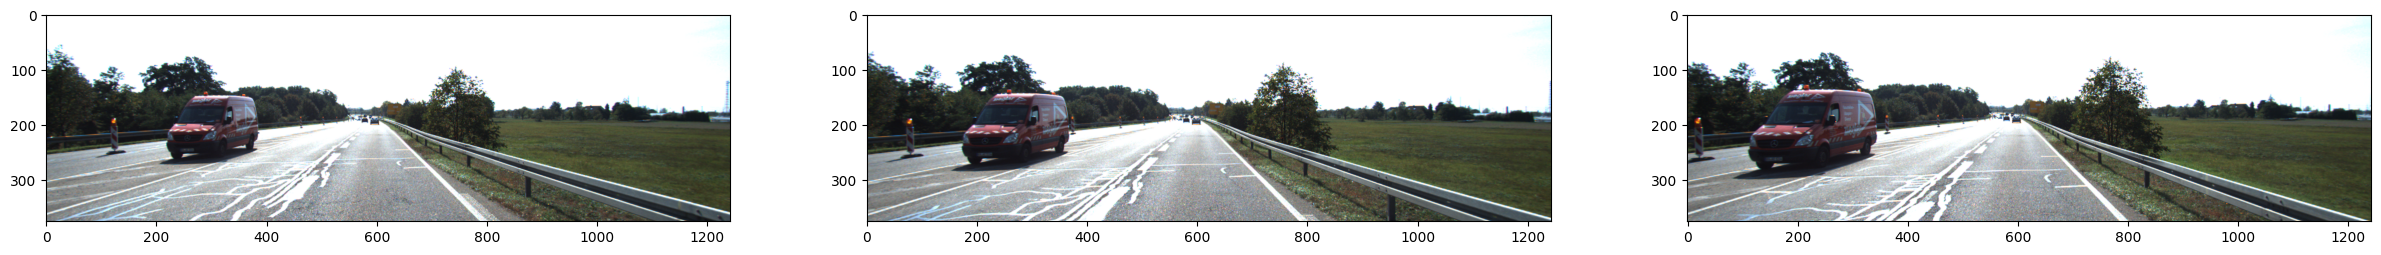

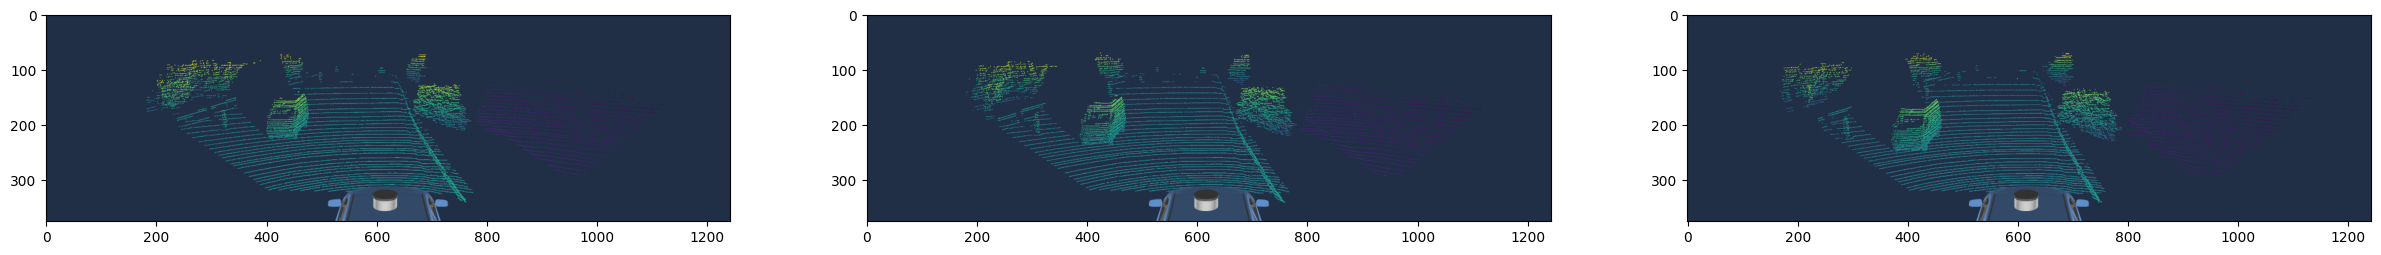

In [14]:
images_2d = glob.glob("frames/*.png")
images_3d = glob.glob("3dframes/*.png")
view_images(sorted(images_2d))
view_images(sorted(images_3d))

**3D**

In [15]:
from vedo import *   # This needs to be imported everytime you need to run this cell or else it wil crash. very important!
settings.default_backend = 'ipyvtk'

visualize_scene(dataset, hand_picked_frames, interactive=True)

[vedo.io.py:1560] INFO: Saved files ./50.x3d and ./50.html
INFO:vedo:Saved files ./50.x3d and ./50.html
[vedo.io.py:1560] INFO: Saved files ./51.x3d and ./51.html
INFO:vedo:Saved files ./51.x3d and ./51.html
[vedo.io.py:1560] INFO: Saved files ./52.x3d and ./52.html
INFO:vedo:Saved files ./52.x3d and ./52.html


In [16]:
%show_interactive_plots

<IPython.core.display.Javascript object>

### **Label Visualization**

**Understanding the Kitti Dataset Format**

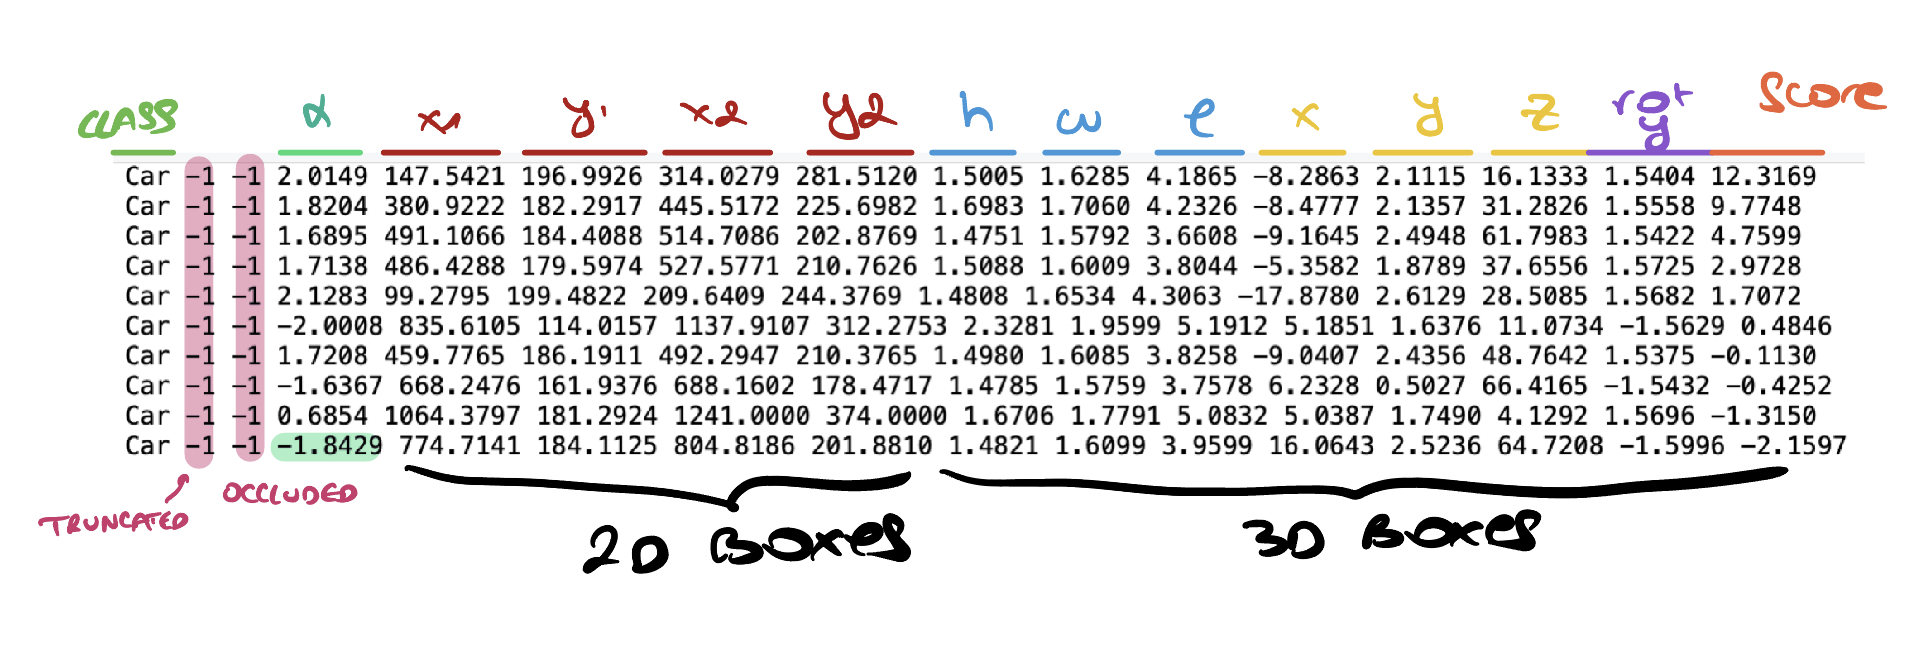

In [17]:
#Pick the Label Path you want to use:
label_path = "multi_object_tracking/detectors/second_iou"

dataset = KittiDataset(root,seq_id=8,label_path=label_path,
                       dataset_cfg = cfg.DATA_CONFIG, class_names = cfg.CLASS_NAMES)

In [18]:
#If you need to restart the visualizer, remove the frames stored
shutil.rmtree('frames', ignore_errors=True)
shutil.rmtree("3dframes", ignore_errors= True)

### Just visualize Raw Data
hand_picked_frames = [0,1,2,3]
settings.default_backend = '2d_image'
settings.default_image_path_for_2d_backend = '3dframes'

visualize_scene(dataset, hand_picked_frames, detection=True, tracking=None, threshold=4)

The new directory 'frames' is created!
The new directory 3dframes is created!


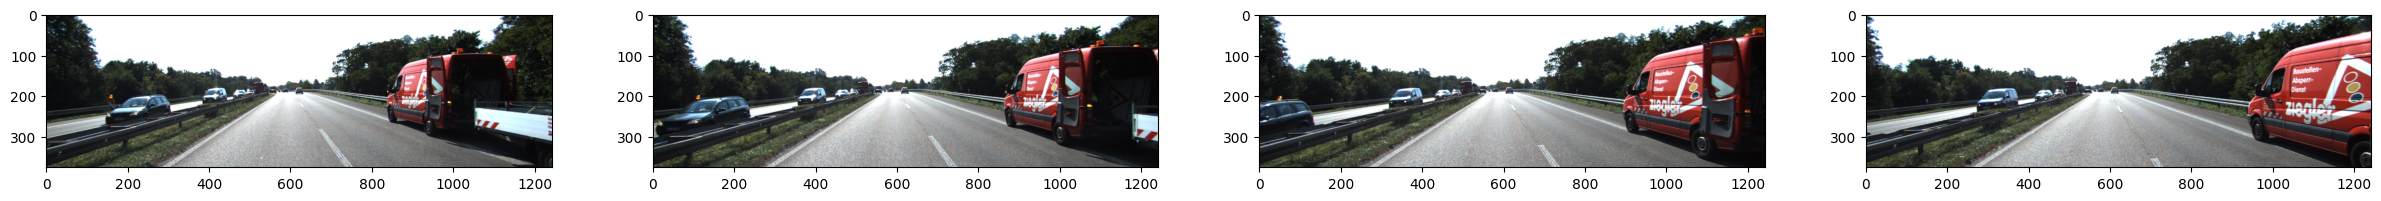

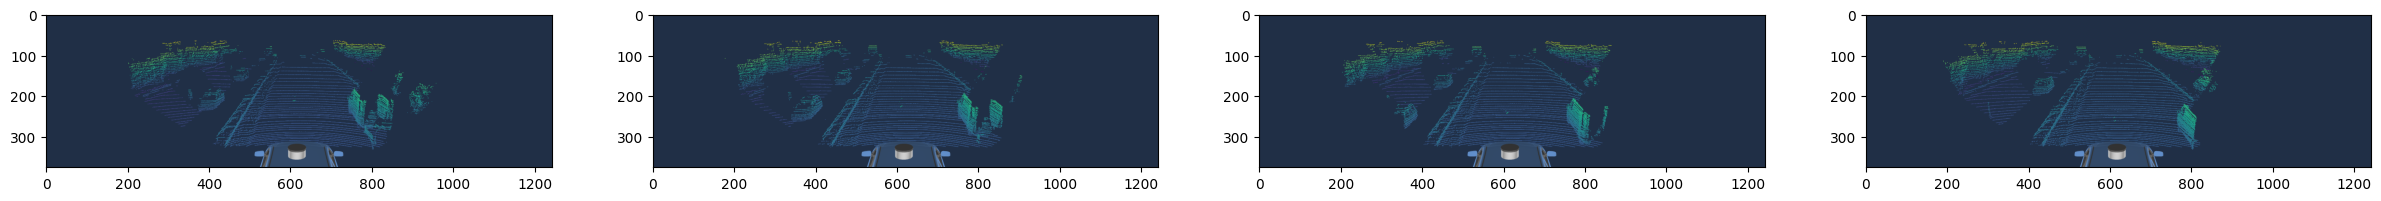

In [19]:
images_2d = glob.glob("frames/*.png")
images_3d = glob.glob("3dframes/*.png")
view_images(sorted(images_2d))
view_images(sorted(images_3d))

**3D**

In [20]:
from vedo import *   # For some reason, this needs to be imported everytime you need to run this cell or else it wil crash. very important!
settings.default_backend = 'ipyvtk'

visualize_scene(dataset, hand_picked_frames, detection=True, interactive=True, threshold=4)

[vedo.io.py:1560] INFO: Saved files ./0.x3d and ./0.html
INFO:vedo:Saved files ./0.x3d and ./0.html
[vedo.io.py:1560] INFO: Saved files ./1.x3d and ./1.html
INFO:vedo:Saved files ./1.x3d and ./1.html
[vedo.io.py:1560] INFO: Saved files ./2.x3d and ./2.html
INFO:vedo:Saved files ./2.x3d and ./2.html
[vedo.io.py:1560] INFO: Saved files ./3.x3d and ./3.html
INFO:vedo:Saved files ./3.x3d and ./3.html


In [21]:
%show_interactive_plots

<IPython.core.display.Javascript object>

## **Part II** — 3D Object Detection: Use Point-RCNN to Make Your Own Labels!

Later in the course, we'll work with Object Trackers. There are 2 types of trackers:
1.   **Separate Trackers**
2.   **Joint Trackers**

The first type first detect objects and then track them (using algorithms we explore in the course). The second type directly outputs tracking based on a sequence (2 images or files sent to a neural network, a tracking input).

In this notebook, we'll use the **first type**. And therefore our first task will be to detect the objects.
<p>

In this notebook, we'll focus on tracking and therefore run this as black box. You'll still be able to understand how this works, play with the point clouds, inputs and outputs.
<p>
There will however be a LiDAR Object Detection course available on Think Autonomous' platform.

[Be sure to be subscribed to my daily emails not to miss them](https://www.thinkautonomous.ai/py).

####PointRCNN
We'll use the library OpenPCDet, which will implement the PointRCNN algorithm based on [this repo](https://github.com/open-mmlab/OpenPCDet).<p>
Here's the architecture we've studied in the course:
![](https://images.velog.io/images/intuition/post/fa83aee5-179b-4f97-926c-2a84622dd417/pointrcnn_architecture.JPG)

**Imports**

In [22]:
from pcdet.models import build_network, load_data_to_gpu

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda9SetDeviceEi'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [23]:
import argparse
import glob
from pathlib import Path
import torch

In [24]:
from box_3d import *

**Set some parameters**

In [25]:
logger = common_utils.create_logger()
model_ckpt = '/content/pointrcnn_7870.pth'
output_file_dir = f'/content/3d_object_detection_results/0008'
id_to_name = {1: 'Car', 2: 'Pedestrian', 3: 'Cyclist', 4: 'Van'}

**Create the Model**

In [26]:
print(cfg.CLASS_NAMES)

['Car', 'Pedestrian', 'Cyclist']


In [27]:
model = build_network(model_cfg=cfg.MODEL, num_class=len(cfg.CLASS_NAMES), dataset=dataset)
model.load_params_from_file(filename=model_ckpt, logger=logger, to_cpu=True)
model.cuda()

2023-10-31 16:07:46,500   INFO  ==> Loading parameters from checkpoint /content/pointrcnn_7870.pth to CPU
2023-10-31 16:07:46,533   INFO  ==> Done (loaded 309/309)


PointRCNN(
  (vfe): None
  (backbone_3d): PointNet2MSG(
    (SA_modules): ModuleList(
      (0): PointnetSAModuleMSG(
        (groupers): ModuleList(
          (0-1): 2 x QueryAndGroup()
        )
        (mlps): ModuleList(
          (0): Sequential(
            (0): Conv2d(4, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU()
            (3): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (5): ReLU()
            (6): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (8): ReLU()
          )
          (1): Sequential(
            (0): Conv2d(4, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(32,

In [28]:
!mkdir -p '/content/3d_object_detection_results/'
!mkdir -p '/content/3d_object_detection_results/0008'

In [29]:
def limit_period(val, offset=0.5, period=np.pi):
    """Limit the value into a period for periodic function.
    Args:
        val (torch.Tensor | np.ndarray): The value to be converted.
        offset (float, optional): Offset to set the value range.
            Defaults to 0.5.
        period ([type], optional): Period of the value. Defaults to np.pi.
    Returns:
        (torch.Tensor | np.ndarray): Value in the range of
            [-offset * period, (1-offset) * period]
    """
    limited_val = val - np.floor(val / period + offset) * period
    return limited_val


**Run inference**

In [30]:
print(len(dataset))

390


In [31]:
print(len(hand_picked_frames))

4


In [32]:
dataset = KittiDataset(root,seq_id=8,label_path=None,
                       dataset_cfg = cfg.DATA_CONFIG, class_names = cfg.CLASS_NAMES)

In [33]:
import torch
torch.__version__

'2.0.0+cu117'

In [34]:
model.eval()
with torch.no_grad():
  for i in hand_picked_frames:
      print(i)
      inference_result = []
      #read data
      data_dict = {k: dataset[i][k] for k in ["points", "frame_id"] if k in dataset[i]}
      data_dict = dataset.collate_batch([data_dict])
      load_data_to_gpu(data_dict)

      #Forward propagation
      pred_dicts, _ = model.forward(data_dict)
      points=data_dict['points']#[:, :3]
      bboxes=pred_dicts[0]['pred_boxes'].cpu().detach().numpy()
      scores=pred_dicts[0]['pred_scores'].cpu().detach().numpy()
      labels=pred_dicts[0]['pred_labels'].cpu().detach().numpy()
      P2 = np.column_stack((dataset[i]["P2"].T, [0,0,1,0]))

      #Postprocess
      inference_result.append([])
      for bbox, score, label in zip(bboxes, scores, labels):
          pos = bbox[:3]  # x, y, z
          dim = bbox[[4, 5, 3]]   # w, h, l
          yaw = bbox[-1]
          yaw = -yaw - np.pi / 2
          yaw = limit_period(yaw, period=np.pi * 2)
          label_name = id_to_name[label]
          inference_result[-1].append(Box3D(pos, dim, yaw, label_name, score, dataset[i]["V2C"].T,P2))

      #Write to file
      output_file_name = output_file_dir + '/' + str(i).zfill(6) + '.txt'
      f = open(output_file_name, 'w+')
      for each_3d_box in inference_result[0]:
          f.write(each_3d_box.to_kitti_format(each_3d_box.confidence))
          f.write('\n')
      f.close()

0
1
2
3


In [35]:
print(bboxes)
print(scores)
print(labels)

[[ 2.2534121e+01  8.7444658e+00 -9.2155147e-01  4.2185793e+00
   1.6758654e+00  1.7575437e+00  3.1530674e+00]
 [ 5.3034035e+01  9.7916660e+00 -1.0264164e+00  4.1093588e+00
   1.7383780e+00  1.5793426e+00 -3.1241188e+00]
 [ 4.0082104e+01  9.4155493e+00 -1.0603358e+00  4.0291486e+00
   1.6552327e+00  1.5836703e+00  3.0834615e+00]
 [ 6.8707512e+01 -2.9804960e-02 -8.0605096e-01  3.7949193e+00
   1.6312160e+00  1.5453970e+00 -2.5217056e-02]
 [ 4.4734779e+01 -6.8785968e+00 -6.3319468e-01  4.1148267e+00
   1.6733437e+00  1.4809585e+00 -3.1048541e+00]
 [ 6.1012859e+01  6.6954923e+00 -6.6096658e-01  3.8645413e+00
   1.6150166e+00  1.5290467e+00  5.2657302e-02]
 [ 3.6942661e+01 -1.5186457e+01 -1.8460849e-01  1.4423714e+00
   6.6913211e-01  1.7379553e+00 -2.7946994e+00]]
[0.9995154  0.9839585  0.9816348  0.37043643 0.29177782 0.2648341
 0.14048052]
[1 1 1 1 1 1 3]


**View Results**

In [36]:
#Pick the Label Path you want to use:
#label_path = "multi_object_tracking/detectors/point_rcnn"
label_path = "/content/3d_object_detection_results"

dataset = KittiDataset(root,seq_id = 8, label_path=label_path, dataset_cfg=cfg.DATA_CONFIG, class_names=cfg.CLASS_NAMES)

In [37]:
from vedo import *
#If you need to restart the visualizer, remove the frames stored
shutil.rmtree('frames', ignore_errors=True)
shutil.rmtree("3dframes", ignore_errors= True)

### Just visualize Raw Data
settings.default_backend = '2d_image'
settings.default_image_path_for_2d_backend = '3dframes'

visualize_scene(dataset, hand_picked_frames, detection=True, tracking=None, threshold=0.7)

The new directory 'frames' is created!
The new directory 3dframes is created!


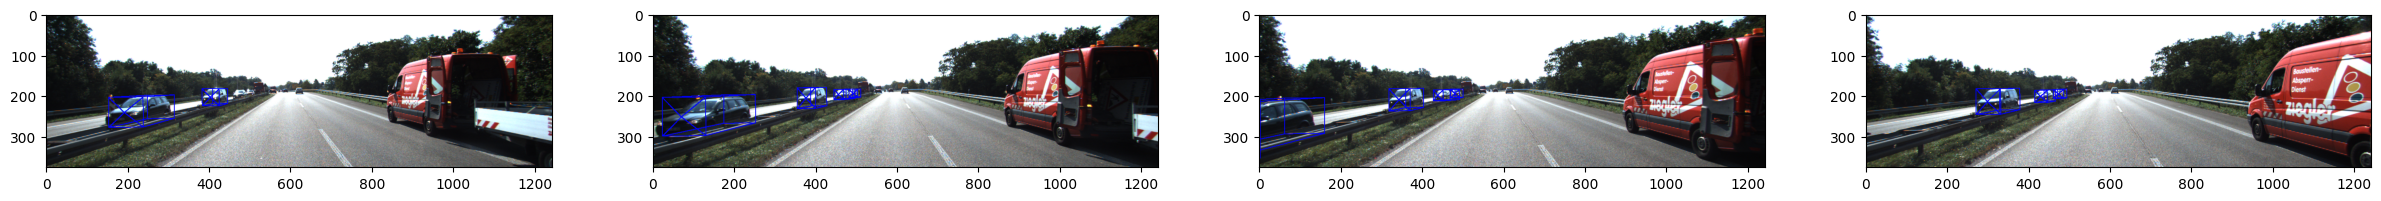

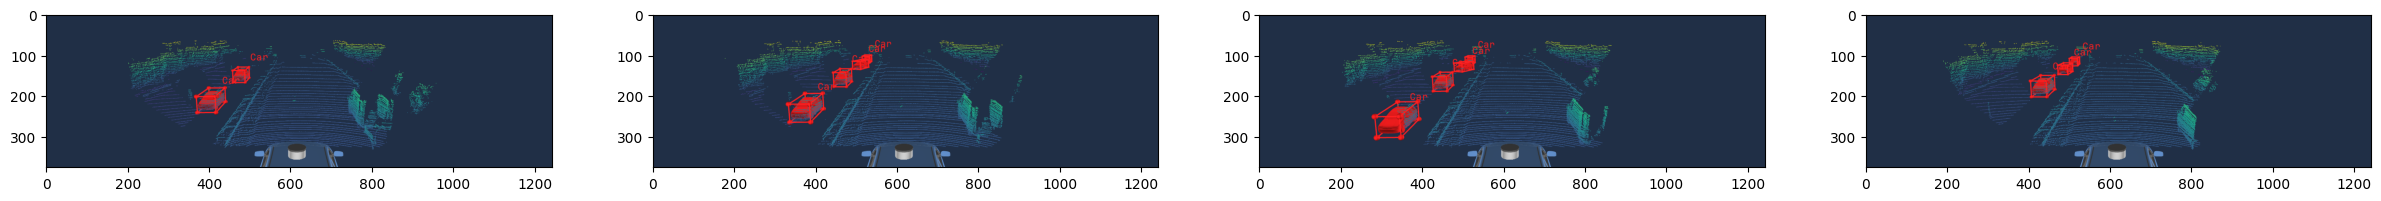

In [38]:
images_2d = glob.glob("frames/*.png")
images_3d = glob.glob("3dframes/*.png")
view_images(sorted(images_2d))
view_images(sorted(images_3d))

**3D**

In [39]:
from vedo import *   # For some reason, this needs to be imported everytime you need to run this cell or else it wil crash. very important!
settings.default_backend = 'ipyvtk'

visualize_scene(dataset, hand_picked_frames, detection=True, interactive=True, threshold=0.7)

[vedo.io.py:1560] INFO: Saved files ./0.x3d and ./0.html
INFO:vedo:Saved files ./0.x3d and ./0.html
[vedo.io.py:1560] INFO: Saved files ./1.x3d and ./1.html
INFO:vedo:Saved files ./1.x3d and ./1.html
[vedo.io.py:1560] INFO: Saved files ./2.x3d and ./2.html
INFO:vedo:Saved files ./2.x3d and ./2.html
[vedo.io.py:1560] INFO: Saved files ./3.x3d and ./3.html
INFO:vedo:Saved files ./3.x3d and ./3.html


In [40]:
%show_interactive_plots

<IPython.core.display.Javascript object>

## **Video** 🎥

In [41]:
!pip freeze > requirements.txt

In [42]:
hand_picked_frames = range(len(dataset))

In [43]:
hand_picked_frames=range(75)

HERE, YOU RUN THE CODE FROM ABOVE THAT RUNS THE POINT-RCNN MODEL

In [44]:
def generate_video(globInputPath,  outvideoFileName):

    video_images = sorted(glob.glob(globInputPath))

    result_video = []
    idx = 0
    stored_obstacles = []

    for out_img in tqdm(video_images):
        out_img_data = cv2.cvtColor(cv2.imread(out_img), cv2.COLOR_BGR2RGB)
        result_video.append(out_img_data)

    out = cv2.VideoWriter(outvideoFileName ,cv2.VideoWriter_fourcc(*'MP4V'), 15, (out_img_data.shape[1],out_img_data.shape[0]))

    for img in result_video:
      out.write(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    out.release()
    print("Output file name " + outvideoFileName + " generated")


In [45]:
_2d_mot_to_view = '2d_OD.mp4'
_3d_mot_to_view = '3d_OD.mp4'

generate_video("/content/frames/*.png", _2d_mot_to_view) #2d
generate_video("/content/3dframes/*.png", _3d_mot_to_view) #3d

100%|██████████| 8/8 [00:00<00:00, 95.05it/s]


Output file name 2d_OD.mp4 generated


100%|██████████| 4/4 [00:00<00:00, 170.89it/s]

Output file name 3d_OD.mp4 generated


In [47]:
_merged_mot_to_view='merged_OD_to_view.mp4'

videos_to_merge = [
   _2d_mot_to_view,  _3d_mot_to_view,
]
titles = ['Point-RCNN (Image)', 'Point-RCNN (LiDAR)']

merge_videos(
    videos_to_merge,
    _merged_mot_to_view,
    grid_size=(2, 1),  # 2 row, 1 cols
    titles=titles,
    title_position=(0.1, 0.1),  # 0.5, 0.5 is center
    max_frames=len(hand_picked_frames))